# Visualize the data

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [87]:
path = './Data/'
files_t = []
files_th = []
for root, _, fs in os.walk(path):
    for f in fs:
        if f.endswith('.dat'):
            if f.split('_')[-2] == '3':
                files_th.append(os.path.join(root,f))
            else:
                files_t.append(os.path.join(root,f))
print(f"contains {len(files_t)} two dim files amd {len(files_th)} three dim files")

contains 18 two dim files amd 4 three dim files


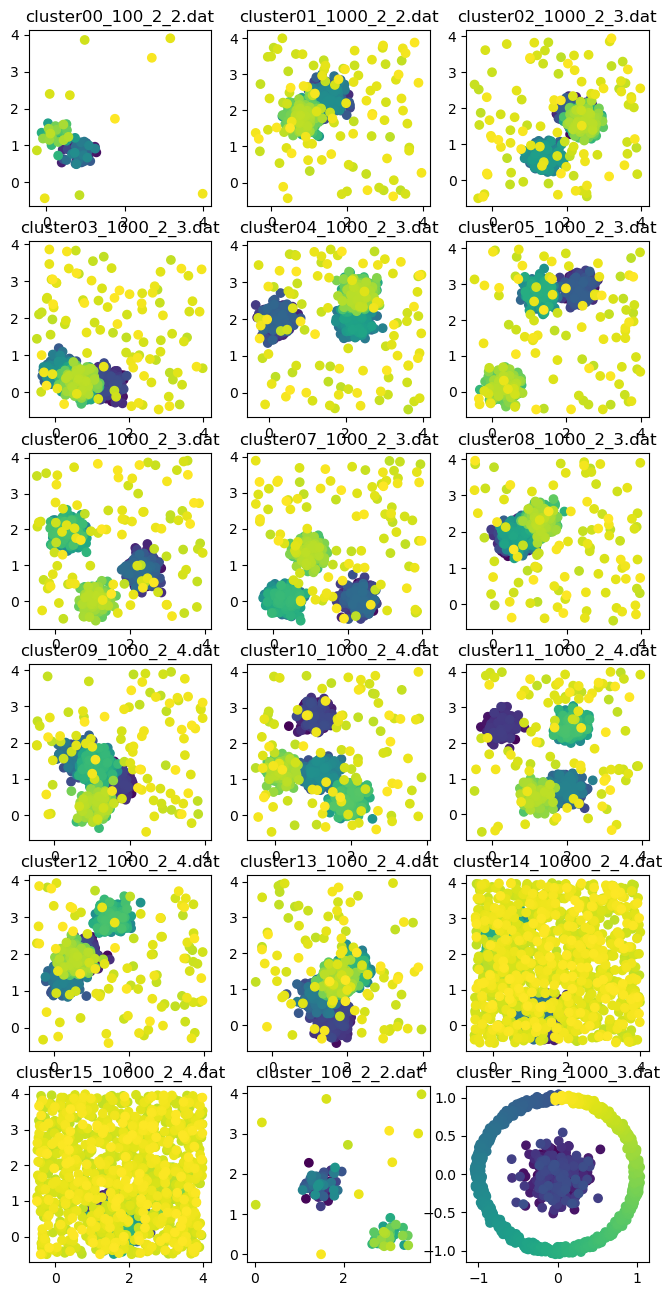

In [88]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(8,16)) 

for f, ax in zip(sorted(files_t), axs.flatten()):
    df = pd.read_csv(f, delimiter=';', usecols=(0,1))
    colors = np.arange(len(df.iloc[:,0]))
    ax.scatter(df.iloc[:, 0],df.iloc[:, 1],c=colors)
    ax.set_title(f"{f.split('/')[-1]}")


# clustering algorithms

In [89]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

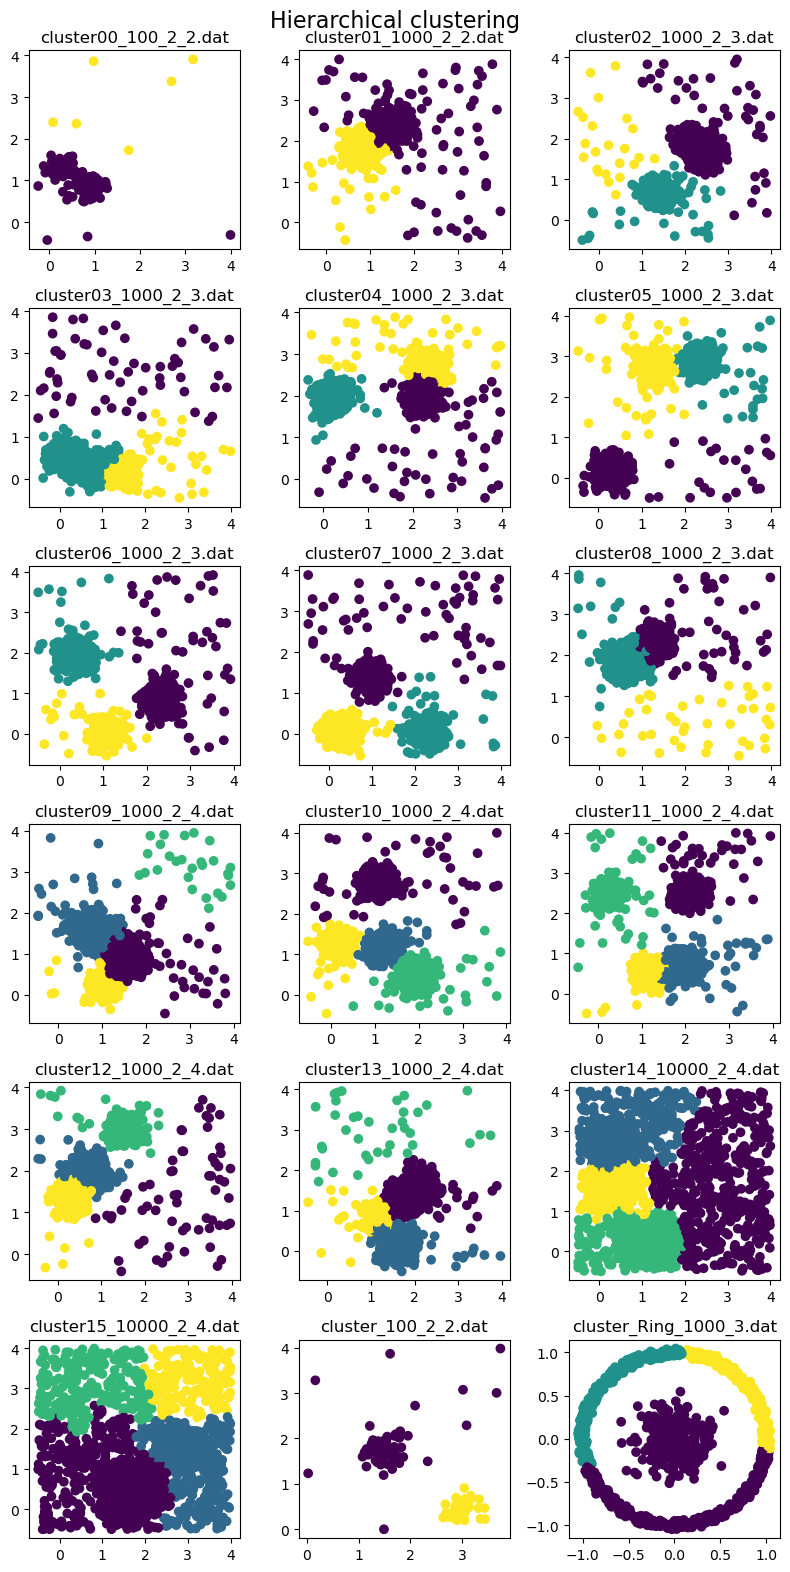

In [113]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(8,16)) 
plt.suptitle("Hierarchical clustering", fontsize = 16)
for f, ax in zip(sorted(files_t), axs.flatten()):
    df = pd.read_csv(f, delimiter=';', usecols=(0,1))
    k = int(f.replace(".","_").split("_")[-2])
    clustering = AgglomerativeClustering(n_clusters=k).fit(df)
    ax.scatter(df.iloc[:, 0],df.iloc[:, 1],c=clustering.labels_)
    ax.set_title(f"{f.split('/')[-1]}")
plt.tight_layout()

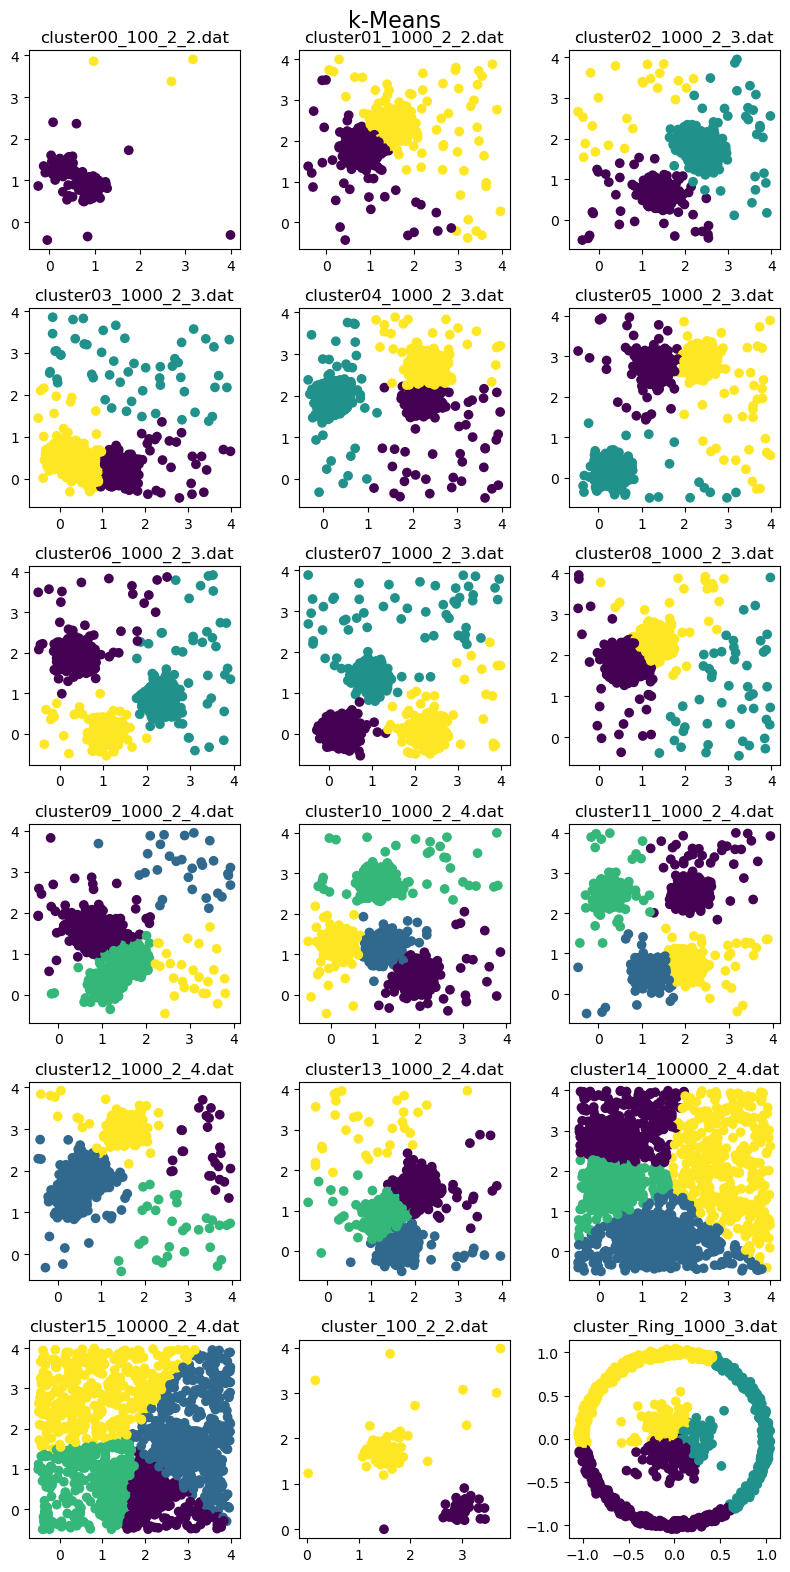

In [119]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(8,16)) 
plt.suptitle("k-Means", size=16)
for f, ax in zip(sorted(files_t), axs.flatten()):
    df = pd.read_csv(f, delimiter=';', usecols=(0,1))
    k = int(f.replace(".","_").split("_")[-2])
    clustering = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df)
    ax.scatter(df.iloc[:, 0],df.iloc[:, 1],c=clustering.labels_)
    ax.set_title(f"{f.split('/')[-1]}")
plt.tight_layout()

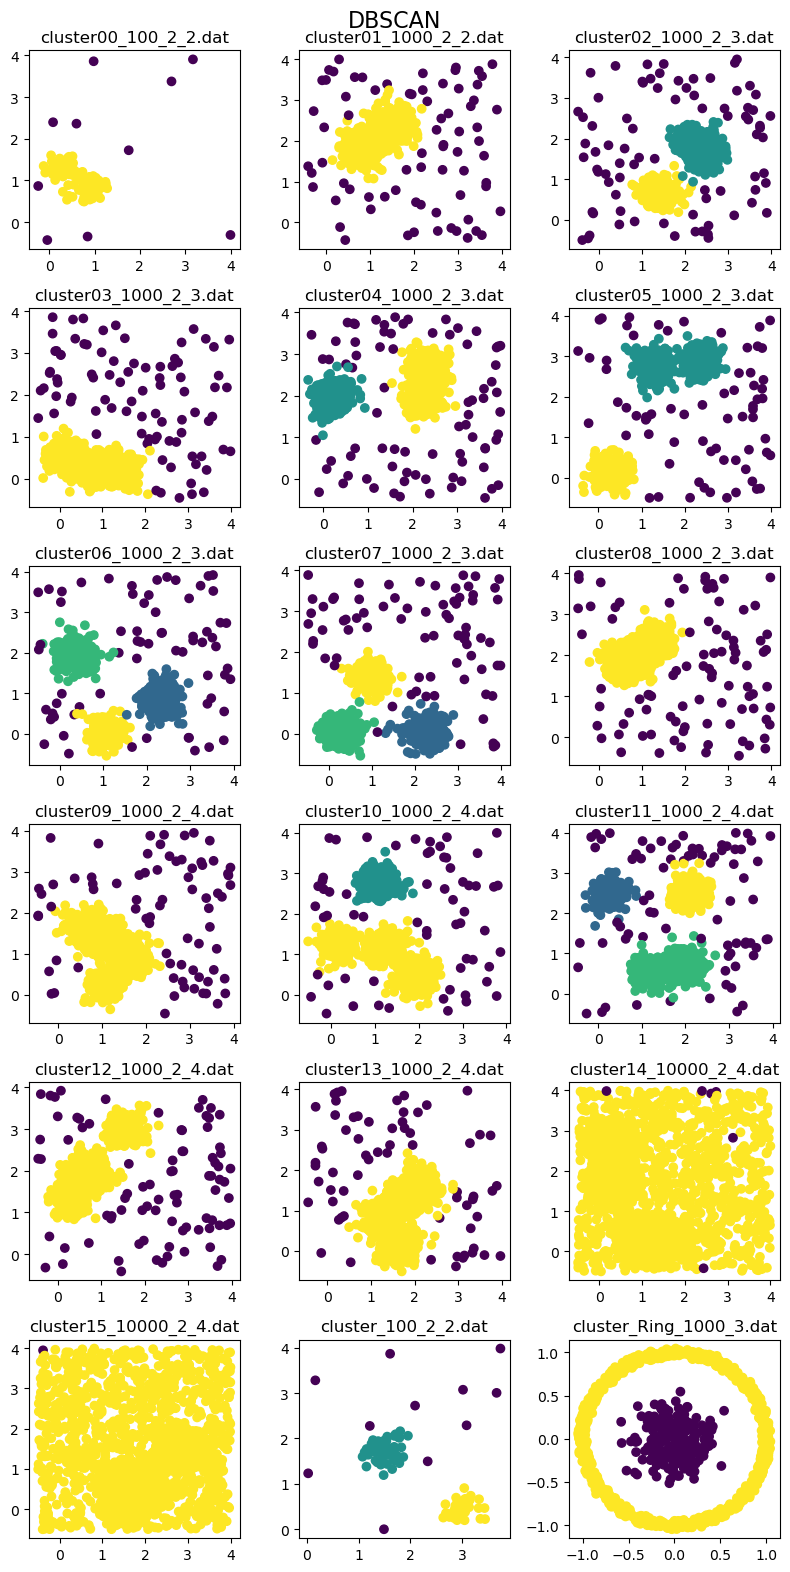

In [126]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(8,16)) 
plt.suptitle("DBSCAN", size=16)
for f, ax in zip(sorted(files_t), axs.flatten()):
    df = pd.read_csv(f, delimiter=';', usecols=(0,1))
    k = int(f.replace(".","_").split("_")[-2])
    clustering = DBSCAN(eps=0.3,min_samples=10).fit(df)
    ax.scatter(df.iloc[:, 0],df.iloc[:, 1],c=clustering.labels_)
    ax.set_title(f"{f.split('/')[-1]}")
plt.tight_layout()

# Evaluate the results

In [127]:
from sklearn.metrics import davies_bouldin_score

(0.0, 10.0)

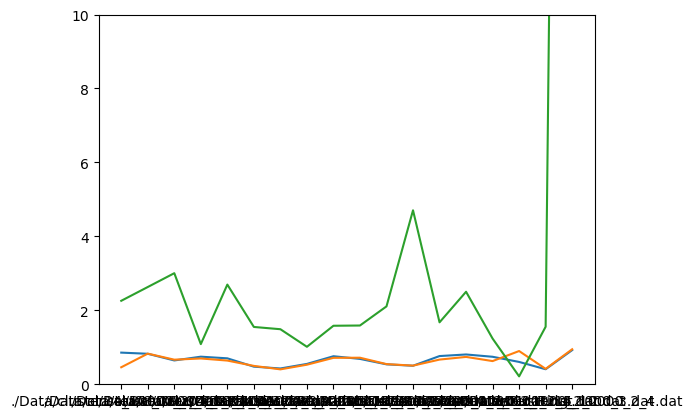

In [132]:
dbs = []
kmean = []
agg = []
for f, ax in zip(sorted(files_t), axs.flatten()):
    df = pd.read_csv(f, delimiter=';', usecols=(0,1))
    k = int(f.replace(".","_").split("_")[-2])
    
    agg_clustering = AgglomerativeClustering(n_clusters=k).fit(df)
    agg.append(davies_bouldin_score(df, agg_clustering.labels_))

    k_clustering = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df)
    kmean.append(davies_bouldin_score(df, k_clustering.labels_))

    dbs_clustering = DBSCAN(eps=0.3,min_samples=10).fit(df)
    dbs.append(davies_bouldin_score(df, dbs_clustering.labels_))

plt.plot(files_t,agg)
plt.plot(files_t,kmean)
plt.plot(files_t,dbs)
plt.ylim(0,10)

# Implementation

In [152]:
import math

In [156]:
def center(list):
    return np.sum(list, axis=0)/len(list)

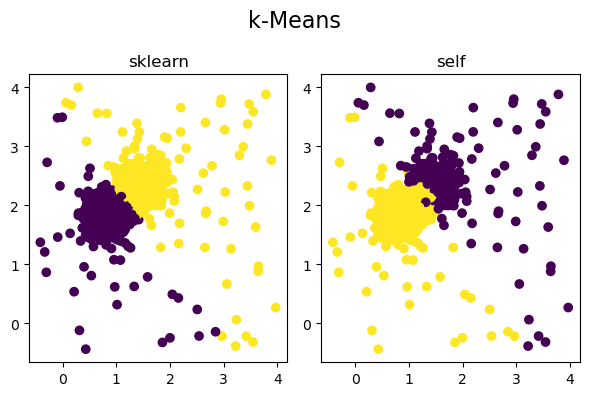

In [175]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6,4)) 
plt.suptitle("k-Means", size=16)
f = path+'cluster01_1000_2_2.dat'
df = pd.read_csv(f, delimiter=';', usecols=(0,1)).to_numpy()

k = int(f.replace(".","_").split("_")[-2])
clustering = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df)
ax1.scatter(df[:, 0],df[:, 1],c=clustering.labels_)
ax1.set_title("sklearn")


idx = np.random.randint(len(df), size=2)

c_1 = [df[idx[0], :]]
c_2 = [df[idx[1], :]]
label = []
for point in df:

    dis_1 = math.dist(point, center(c_1))
    dis_2 = math.dist(point, center(c_2))
    
    if dis_1 < dis_2:
        c_1.append(point)
        label.append(1)
    else:
        c_2.append(point)
        label.append(2)
ax2.scatter(df[:, 0],df[:, 1],c=label)
ax2.set_title("self")
plt.tight_layout()
